## Peterson Barney Data
+ ###### Author: Dirk Van Compernolle   
+ ###### Modification History:  9/1/2024
+ ###### pyspch >=  0.8


##### Reference
G. Peterson and H. Barney, "Control methods used in a study of vowels," Journal of the Acoustical Society 
of America, vol. 24, pp. 175-184, 1952   .
##### Purpose
Recreate some Peterson Barney statistics and plots

##### Disclaimers  
+  The original speech data was not preserved, but the formant measurements were.  I don't remember exactly how I got them; I believeindirectly  through an effort of Tony Robinson  
+  The average formant values obtained in this paper slightly deviate from the ones published in the 1952 paper.  I don't know (and did not investigate) is this is due to numerical errors, mumerical procedures (eliminating outliers) or if there are some erros with the data used here 
The differences
are not significant in any matter.       
+ This data is much cleaner and more consistent than the data later collected by Hillenbrand (1995).  So in a sense, this data looks too good to be true.




.

In [1]:
# uncomment the pip install command to install pyspch -- it is required!
#
#!pip install git+https://github.com/compi1234/pyspch.git
#
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
# do all the imports and some generic settings
%matplotlib inline
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import librosa
from copy import copy,deepcopy

import pyspch.core as Spch
import pyspch.display as Spd
from pyspch.core.hillenbrand import fetch_hillenbrand, select_hillenbrand
#
np.set_printoptions(precision=2)
pd.options.display.float_format = '     {:.0f}  '.format
mpl.rcParams['figure.figsize'] = [8.,8.]
mpl.rcParams['font.size'] = 10
# get default color and marker orders for pyspch.display
markers = Spd.markers

In [3]:
# wrappers for frequency to mel transformation for F2 and F3
# the Peterson Barney paper isn't clear on which transformation is used
# we'll use the HTK formulas which are borrowed from Fant, which could
# have been what they used.  You can play with different transformations by 
# changing these functions.  
# Different functions can be implemented with the GLOBAL flag F2SCALE
# Currently supported options 
#   F2SCALE = 'HTK'  --> HTK mel scale
#           default  --> no warping, linear frequencies maintained
F2SCALE = 'HTK'
def f2m(f):
    if F2SCALE == 'HTK':
        return(librosa.hz_to_mel(f,htk=True))
    else: 
        return(f)
def m2f(m):
    if F2SCALE == 'HTK':
        return(librosa.mel_to_hz(m,htk=True))
    else:
        return(m)

### Read the data 

In [4]:
file = 'https://homes.esat.kuleuven.be/~spchlab/data/PetersonBarney/peterson_barney_adults.csv'    
data_raw = pd.read_csv(file,sep=';')
# select subset of columns for further work in data DataFrame
data = data_raw.loc[:,["vowel","gender","F1","F2","F3"]]
vowels = ['IY','IH','EH','AE','AA','AO','UH','UW','AH','ER']
words = ["heed","hid","head","had","hod","hawed","hood","who'd","hud","heard"]
genders = ['M','W']
colors = ['blue', 'magenta', 'navy', 'cyan', 'green','limegreen',
          'darkorange',
         'red','brown', 'gold']
vowel2color = dict(zip(vowels,colors))
color2vowel = dict(zip(colors,vowels))
cmap = sns.color_palette(colors)
sns.set_palette(cmap)

### Compute average Formant Values
The computations are done gender independent and gender dependent

In [5]:
formants_gd = data.groupby(by=["vowel","gender"]).mean().unstack().loc[vowels]
formants_all = data.groupby(by=["vowel"]).mean().loc[vowels]
display(formants_all.T)
display(formants_gd.T)

vowel,IY,IH,EH,AE,AA,AO,UH,UW,AH,ER
F1,287,415,564,755,785,577,452,340,689,495
F2,2518,2214,2074,1875,1154,872,1087,915,1291,1489
F3,3109,2795,2719,2609,2599,2556,2447,2435,2557,1832


vowel              IY          IH          EH          AE          AA  \
   gender                                                               
F1 M            267         392         526         664         718     
   W            310         441         608         863         864     
F2 M           2294        1993        1854        1727        1091     
   W           2783        2474        2334        2049        1229     
F3 M           2937        2569        2481        2420        2442     
   W           3312        3063        2999        2832        2783     

vowel              AO          UH          UW          AH          ER  
   gender                                                              
F1 M            568         437         307         631         489    
   W            587         469         378         758         503    
F2 M            836        1023         876        1192        1360    
   W            915        1162         961        1409        1641    
F3 M           2403        2245        2239        2377        1709    
   W           2736        2685        2666        2768        1977

In [6]:
# now display with the example words
formants_all.insert(0,"word",words)
formants_all.set_index(['word'],append=True,inplace=True)
formants_gd.insert(0,"word",words)
formants_gd.set_index(['word'],append=True,inplace=True)
display(formants_all.T)
display(formants_gd.T)

vowel,IY,IH,EH,AE,AA,AO,UH,UW,AH,ER
word,heed,hid,head,had,hod,hawed,hood,who'd,hud,heard
F1,287,415,564,755,785,577,452,340,689,495
F2,2518,2214,2074,1875,1154,872,1087,915,1291,1489
F3,3109,2795,2719,2609,2599,2556,2447,2435,2557,1832


vowel              IY          IH          EH          AE          AA  \
word             heed         hid        head         had         hod   
   gender                                                               
F1 M            267         392         526         664         718     
   W            310         441         608         863         864     
F2 M           2294        1993        1854        1727        1091     
   W           2783        2474        2334        2049        1229     
F3 M           2937        2569        2481        2420        2442     
   W           3312        3063        2999        2832        2783     

vowel              AO          UH          UW          AH          ER  
word            hawed        hood       who'd         hud       heard  
   gender                                                              
F1 M            568         437         307         631         489    
   W            587         469         378         758         503    
F2 M            836        1023         876        1192        1360    
   W            915        1162         961        1409        1641    
F3 M           2403        2245        2239        2377        1709    
   W           2736        2685        2666        2768        1977

In [7]:
# To be consistent with the figures below where we plot on semilog axis (F1 linear, F2 logarithmic)
# we should average over log values of F2 and F3 and then convert back to Hz
# we will denote F2l and F3l to emphasize such internal transformations
# all by all the effect is minimal
data['F2l']=f2m(data['F2'])
data['F3l']=f2m(data['F3'])
formants_all = data.groupby(by=["vowel"]).mean().loc[vowels]
formants_gd = data.groupby(by=["vowel","gender"]).mean().unstack().loc[vowels]

# if you want to view F2l reconverted to Hz uncomment the lines below
formants_all['F2'] = m2f(formants_all['F2l'])
formants_all['F3'] = m2f(formants_all['F3l'])
formants_gd['F2'] = m2f(formants_gd['F2l'])
formants_gd['F3'] = m2f(formants_gd['F3l'])

display(formants_all.T)
display(formants_gd.T)

vowel,IY,IH,EH,AE,AA,AO,UH,UW,AH,ER
F1,287,415,564,755,785,577,452,340,689,495
F2,2506,2201,2061,1866,1150,867,1080,906,1285,1480
F3,3099,2784,2707,2599,2587,2544,2435,2420,2547,1822
F2l,1715,1602,1547,1464,1095,908,1052,936,1175,1280
F3l,1906,1809,1783,1747,1743,1728,1690,1684,1729,1445


vowel               IY          IH          EH          AE          AA  \
    gender                                                               
F1  M            267         392         526         664         718     
    W            310         441         608         863         864     
F2  M           2291        1991        1852        1724        1088     
    W           2780        2470        2331        2043        1226     
F3  M           2933        2566        2479        2417        2435     
    W           3305        3060        2996        2828        2777     
F2l M           1637        1517        1458        1400        1057     
    W           1807        1702        1652        1539        1141     
F3l M           1856        1736        1705        1683        1690     
    W           1966        1895        1875        1823        1806     

vowel               AO          UH          UW          AH          ER  
    gender                                                              
F1  M            568         437         307         631         489    
    W            587         469         378         758         503    
F2  M            832        1019         868        1189        1358    
    W            910        1155         952        1405        1634    
F3  M           2396        2241        2230        2373        1705    
    W           2728        2679        2660        2764        1967    
F2l M            883        1012         909        1119        1215    
    W            939        1098         968        1241        1357    
F3l M           1676        1618        1613        1667        1391    
    W           1790        1774        1768        1802        1507

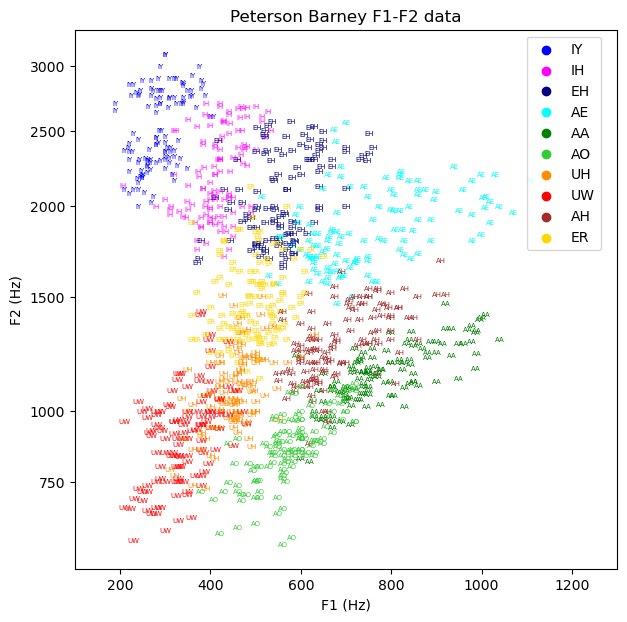

In [8]:
# plotting on semilog axis, i.e. plotting ( F1,log(F2) ) maintaining axis labels in Hz
yticks = np.array([750,1000,1500,2000,2500,3000])
yticks_l= f2m(yticks)
ytick_labels = ["750","1000","1500","2000","2500","3000"]
marker_size = 20
text_size = 5
PLT_TEXT = True
#
fig1,ax = plt.subplots(figsize=(7,7))
if PLT_TEXT: marker_size = 0
sns.scatterplot(ax=ax,x='F1',y='F2l',data=data,hue="vowel",marker='D',s=marker_size,hue_order=vowels)
if PLT_TEXT:
    for i,entry in data.iterrows():
        vow = entry['vowel']
        ax.text(entry['F1'],entry['F2l'],vow,ha='center',va='center',fontsize=text_size,color=vowel2color[vow] )
ax.set_yticks(yticks_l,ytick_labels)
ax.set_xlim([100,1300])
ax.legend(loc='upper left', bbox_to_anchor=(0.82,1));
ax.set_xlabel('F1 (Hz)')
ax.set_ylabel('F2 (Hz)')
ax.set_title('Peterson Barney F1-F2 data');

### Gaussian Modeling and Confidence Ellipses
Gaussian modeling is a standard and intuitive approach for scatter data as observed in the Peterson Barney data.   
We show the data with a number of confidence ellipses; values selected are 1.0, 1.5 and 2.0.
The Gaussian model may not be perfect, but it does a more than decent job.
The 2*sigma contours are a sensible approximation of the region wherein Formants of a specific vowel are expected to appear.   
Small variants are made of this plot: just the confidence ellipses, the mean values added to them and the mean values per gender added to the plots.  The latter shows considerable variation between male and female values (due to vocal tract length differences) and it also draws our attention to the underlying bimodal distribution of the data.

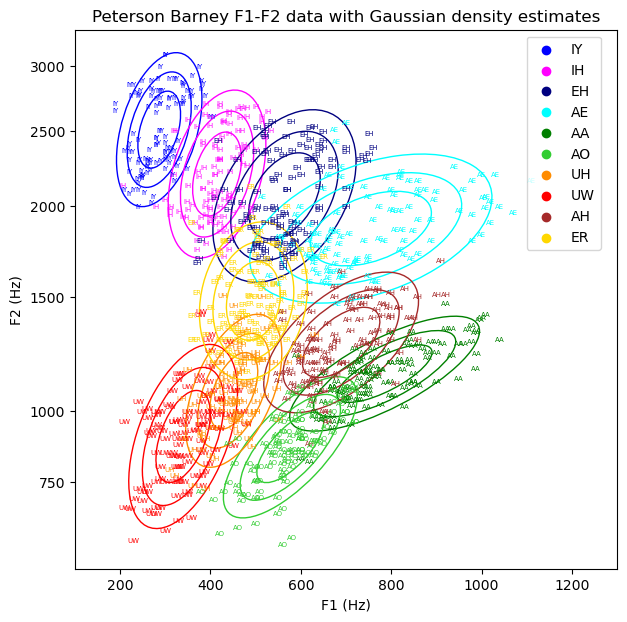

In [9]:
# add confidence ellipses to previous plots
fig2 = deepcopy(fig1)
ax = fig2.get_axes()[0]
xfeat = 'F1'
yfeat = 'F2l'
sigmas = [1, 1.5, 2.0]
for vow in vowels:
    vowdata = data.loc[ data['vowel'].isin([vow]) ]  
    for sig in sigmas:
        Spch.plot_confidence_ellipse(vowdata[xfeat], vowdata[yfeat], ax, n_std=sig, edgecolor=vowel2color[vow] )
ax.set_title('Peterson Barney F1-F2 data with Gaussian density estimates');
#
display(fig2)

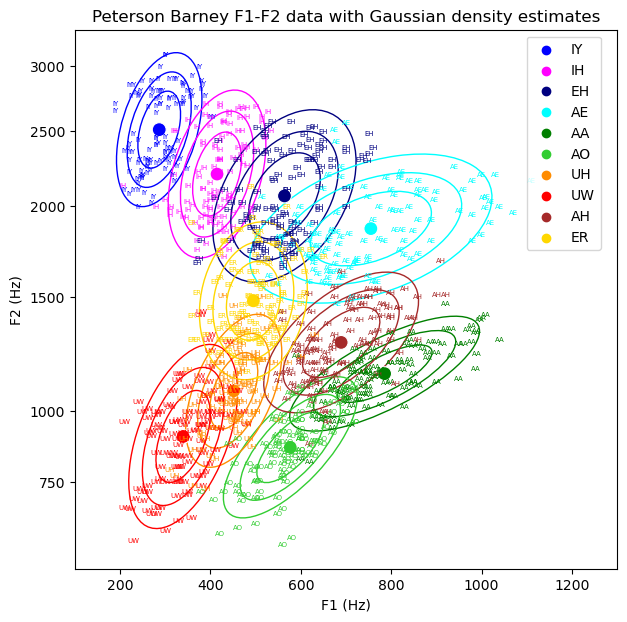

In [10]:
# add average formant values to the plot
fig3 = deepcopy(fig2)
ax = fig3.get_axes()[0]
sns.scatterplot(data=formants_all,ax=ax,x='F1',y=formants_all['F2l'],
                hue='vowel',hue_order=vowels,s=100,legend=False)  
fig3

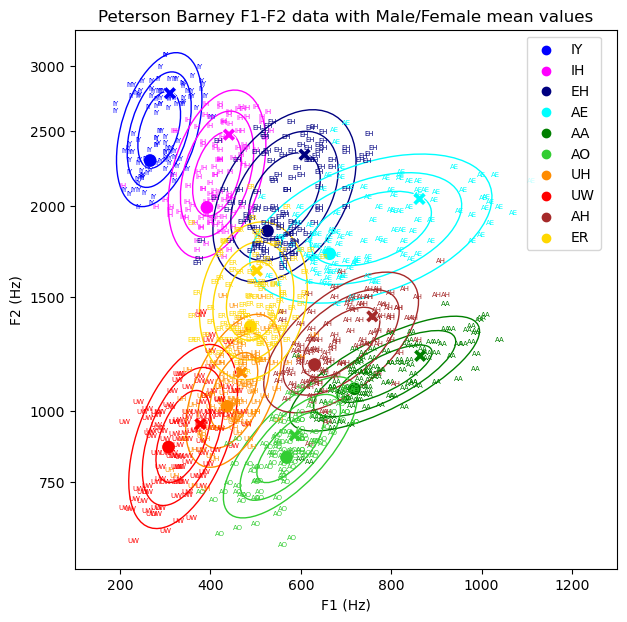

In [11]:
# add average formant values BY GENDER to the plot
fig3b = deepcopy(fig2)
ax = fig3b.get_axes()[0]
sns.scatterplot(data=formants_gd.stack(),ax=ax,x='F1',y='F2l', 
                hue='vowel',hue_order=vowels,style="gender",s=100,legend=False)  
ax.set_title('Peterson Barney F1-F2 data with Male/Female mean values');
fig3b

### Kernel Density Estimates
It is clear that our Gaussian Density estimates of the Formant distributions
don't match well with the per formant 'regions' drawn in the paper
We may assume that these were drawn by hand and inspired by a motivation to come up
with maximally non overlapping F1-F2 regions
Here we use Kernel Density plots that are more suitable to model data that is not Gaussian.   
We played a bit with the control parameters and this is the best we could come up with.
For some regions, like 'IY' and 'IH' the results are quite good.  However the same parameters
don't seem to work well for e.g. the 'AE' region .  Also the overlap of the 'UW' vs 'UH' and 'AA' vs 'AO' is significantly larger than in the PB plots, which hints as a bias in the human interpretation of the results in the PB paper.

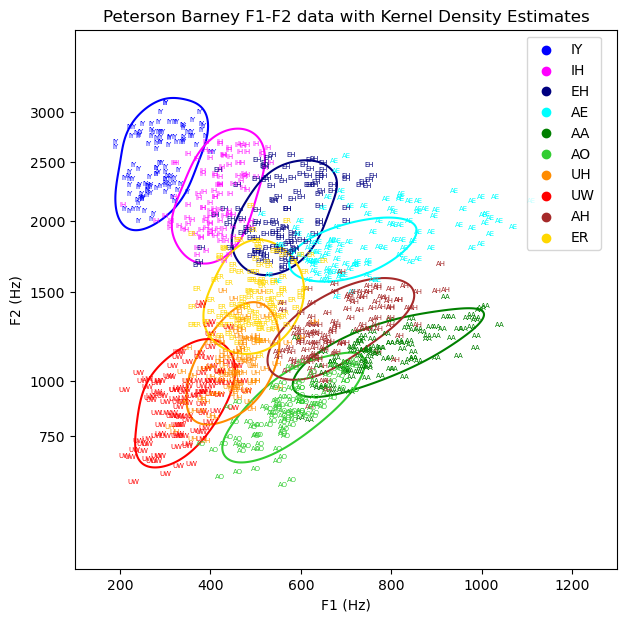

In [12]:
#
fig4 = deepcopy(fig1)
ax = fig4.axes[0]
sns.kdeplot(data, x="F1", y="F2l",hue="vowel", ax=ax, hue_order=vowels,levels=[ 0.35 ],bw_adjust=1.8,legend=None)
ax.set_title('Peterson Barney F1-F2 data with Kernel Density Estimates');
fig4

In [13]:
# convert the full notebook
! jupyter nbconvert PetersonBarney.ipynb --to html

[NbConvertApp] Converting notebook PetersonBarney.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 1220529 bytes to PetersonBarney.html


In [15]:
# save selected figures
fig1.savefig("../figures/pb_fig1.png")
fig2.savefig("../figures/pb_fig2.png")
fig3.savefig("../figures/pb_fig3.png")
fig3b.savefig("../figures/pb_fig3b.png")
fig4.savefig("../figures/pb_fig4.png")